In [0]:
# Regression



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

# Preprocessing

import matplotlib.pyplot as plt
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import linear_model, metrics, svm
from sklearn.decomposition import PCA
from sklearn.ensemble import (AdaBoostRegressor, BaggingRegressor,
                              RandomForestRegressor)
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import (GridSearchCV, KFold, cross_val_score,
                                     train_test_split)
from sklearn.preprocessing import Imputer, MinMaxScaler, MultiLabelBinarizer
from sklearn.tree import DecisionTreeRegressor

# Read data set
data = pd.read_csv("/content/drive/My Drive/ALDA_Project/Dataset/train.csv") 

columns = ['id', 'zipcode', 'description', 'name', 'thumbnail_url']
data.drop(columns, inplace = True, axis=1)

# Review date should not affect price.
cols = ['first_review', 'last_review', 'host_since']
data.drop(cols, inplace = True, axis=1)

# Transform columns
data['cleaning_fee'] = data['cleaning_fee'].astype(int)
data['instant_bookable'] = data['instant_bookable'].map({'f': 0, 't': 1})
data['host_has_profile_pic'] = data['host_has_profile_pic'].map({'f': 0, 't': 1})
data['host_identity_verified'] = data['host_identity_verified'].map({'f': 0, 't': 1})

# Remove % sign from host_response_rate
def process_host_resp(s):
    if isinstance(s, str):
        return float(s[:-1])
data['host_response_rate'] = data['host_response_rate'].apply(process_host_resp)

# One hot encoding - property type, room type, amenities, bed type, cancellations, 
categorical=['property_type','room_type','bed_type','cancellation_policy','city','neighbourhood']
data = pd.get_dummies(data, columns=categorical)


data['amenities'] = data['amenities'].apply(lambda s: s.replace('"', "").replace('{', "").replace('}', ""))
data['amenities'] = data['amenities'].apply(lambda s: s.split(","))

mlb = MultiLabelBinarizer()
data = data.join(pd.DataFrame(mlb.fit_transform(data.pop('amenities')),
                          columns=mlb.classes_,
                          index=data.index))

# Fill missing data with medians
data = data.fillna(data.median())


In [0]:

import matplotlib.pyplot as plt
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import linear_model, metrics, svm
from sklearn.decomposition import PCA
from sklearn.ensemble import (AdaBoostRegressor, BaggingRegressor,
                              RandomForestRegressor)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import (GridSearchCV, KFold, cross_val_score,
                                     train_test_split)
from sklearn.preprocessing import Imputer, MinMaxScaler, MultiLabelBinarizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
import xgboost

labels = data['log_price']
data = data.drop('log_price', 1)

# Normalize data
data = (data - data.min())/(data.max() - data.min())


(74111, 817)


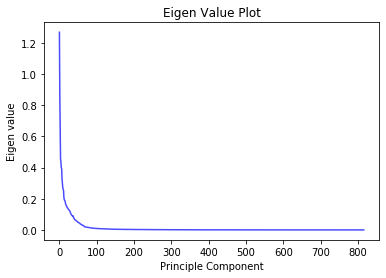

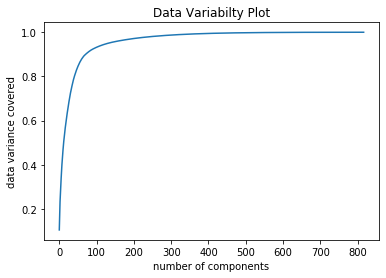

In [0]:
print(data.shape)
cov_matrix = data.cov()
eigen_values,eigen_vectors = np.linalg.eig(cov_matrix)
plt.plot(range(len(eigen_values)),eigen_values,alpha=0.7, color = "blue")
plt.xlabel("Principle Component")
plt.ylabel("Eigen value")
plt.title("Eigen Value Plot")
plt.show()


pca = PCA().fit(data)
plt.title("Data Variabilty Plot")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('data variance covered')
plt.show()

In [0]:
def linear_reg_model(data_train, data_test, labels_train, labels_test):
  cov_matrix = data_train.cov()
  eigen_values,eigen_vectors = np.linalg.eig(cov_matrix)
  #plt.plot(range(len(eigen_values)),eigen_values,alpha=0.7, color = "green")
  #plt.xlabel("Principle Component")
  #plt.ylabel("Eigen value")
  #plt.title("Eigen Value Plot")
  #plt.show()

  pca = PCA(n_components = 85) 
  pca.fit(data_train) # fit using train and transform train and test data
  data_train = pd.DataFrame(pca.transform(data_train)) 
  data_test = pd.DataFrame(pca.transform(data_test))

  reg = LinearRegression().fit(data_train,labels_train)
  labels_pred = reg.predict(data_test)
  labels_test_np = labels_test.to_numpy()
  test_mse = metrics.mean_squared_error(labels_test_np, labels_pred)
  #print("Test MSE",test_mse)

  labels_train_pred = reg.predict(data_train)
  train_mse = metrics.mean_squared_error(labels_train.to_numpy(), labels_train_pred)
  print("r2:",metrics.r2_score(labels_test_np, labels_pred))
  #print("Train MSE",train_mse)
  #mean_label = labels.mean()
  #print("Mean deviation: ", mse/mean_label * 100)

  df=pd.DataFrame({'x': range(len(labels_test_np)), 'test': labels_test_np, 'predicted': labels_pred })
  plt.plot( 'x', 'test', data=df)
  plt.plot( 'x', 'predicted', data=df)
  plt.show()
  return train_mse,test_mse

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


r2: 0.7150325359725331


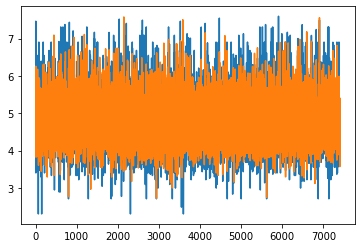

In [0]:
train_mse_lin,test_mse_lin = xgboosterFunc(X_train, X_test, y_train, y_test)

In [0]:

def xgboosterFunc(data_train, data_test, labels_train, labels_test):

  xgb = xgboost.XGBRegressor(colsample_bytree=0.8, subsample=0.8, learning_rate=0.05, max_depth=3, 
                              min_child_weight=3, n_estimators=1000,gamma=0.0, silent=1)
  
  xgb.fit(data_train, labels_train)
  xgb_train_pred = xgb.predict(data_train)
  xgb_test_pred = xgb.predict(data_test)
  labels_test_np = labels_test.to_numpy()
  train_mse = metrics.mean_squared_error(labels_train.to_numpy(), xgb_train_pred)
  test_mse = metrics.mean_squared_error(labels_test.to_numpy(), xgb_test_pred)
  print("r2:",metrics.r2_score(labels_test_np, xgb_test_pred))
  df=pd.DataFrame({'x': range(len(labels_test_np)), 'test': labels_test_np, 'predicted': xgb_test_pred })
  plt.plot( 'x', 'test', data=df)
  plt.plot( 'x', 'predicted', data=df)
  plt.show()

  return train_mse, test_mse

Round:  1


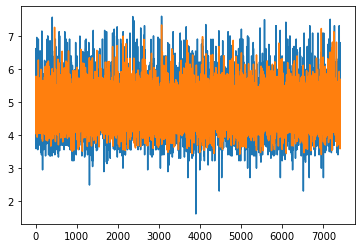

Train error:  0.21840873022623525
Test error:  0.21722303634886223


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


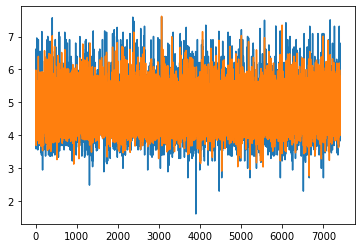

Train error:  0.13830092450425827
Test error:  0.15189293472960064
Round:  2


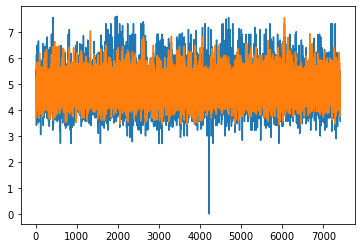

Train error:  0.2189104247096099
Test error:  0.21270542049941082


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


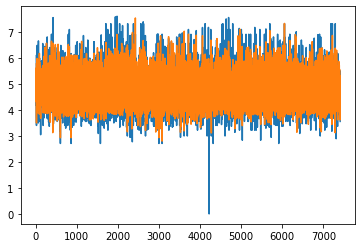

Train error:  0.13933258836598014
Test error:  0.1417213869568442
Round:  3


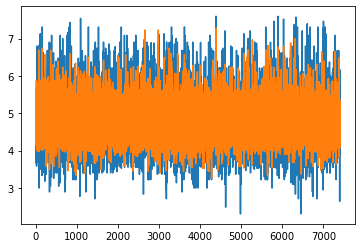

Train error:  0.2186542410383282
Test error:  0.21521266598841168


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


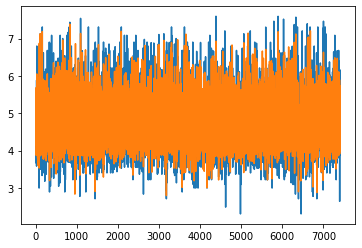

Train error:  0.13897093939632646
Test error:  0.14471031626542455
Round:  4


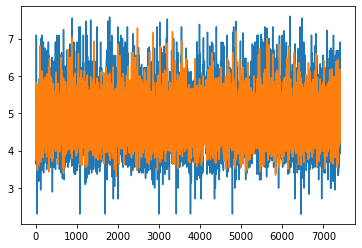

Train error:  0.21770998129855948
Test error:  0.22360964153214485


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


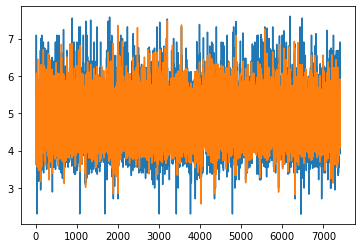

Train error:  0.1386443248939275
Test error:  0.15174069222611156
Round:  5


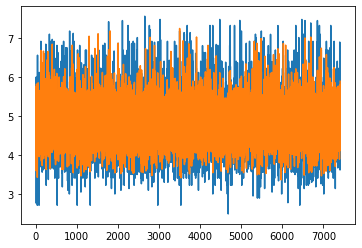

Train error:  0.2189900104530354
Test error:  0.21248892476537162


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


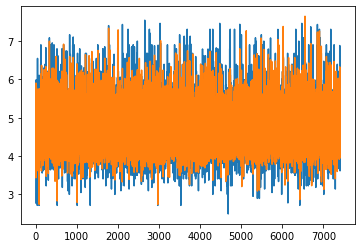

Train error:  0.1396351925701198
Test error:  0.14013616063430506
Round:  6


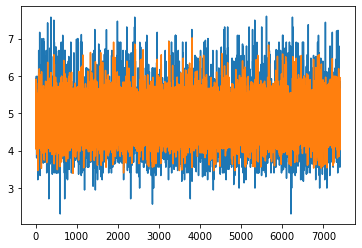

Train error:  0.21842031299620737
Test error:  0.21764793603328572


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


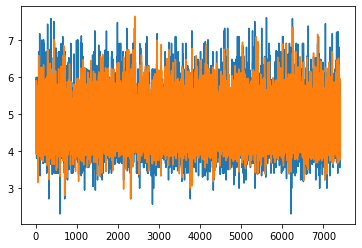

Train error:  0.1390993743681525
Test error:  0.1440446286565496
Round:  7


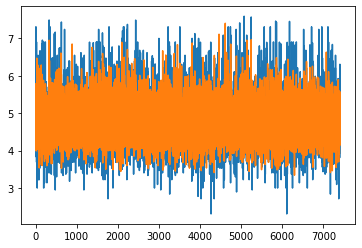

Train error:  0.21850959641420878
Test error:  0.21585016068770704


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


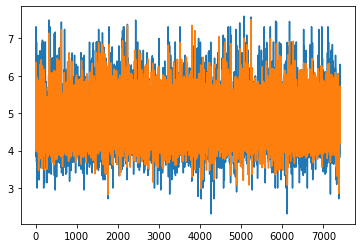

Train error:  0.1392156729090429
Test error:  0.14638792711856846
Round:  8


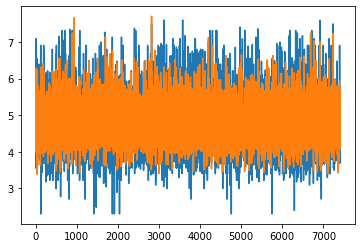

Train error:  0.2176533763488042
Test error:  0.22357436476601972


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


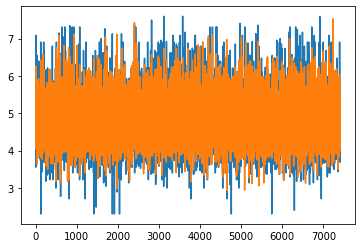

Train error:  0.13901963418111593
Test error:  0.14648803238173363
Round:  9


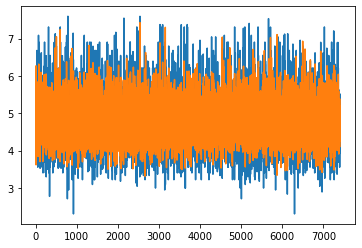

Train error:  0.2180840715627061
Test error:  0.22045509715449393


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


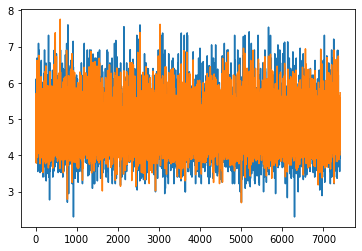

Train error:  0.13887058925908716
Test error:  0.14815681362670974
Round:  10


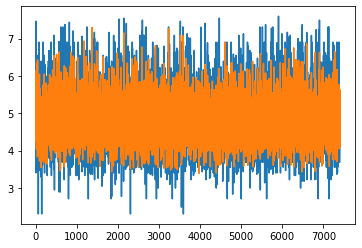

Train error:  0.21702434027772727
Test error:  0.22960148110142015


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


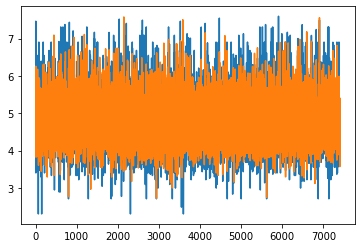

Train error:  0.13835343224677968
Test error:  0.15156900764736433
Traditional Linear Regression
Train mse after 10-fold CV:  0.21823650853254223
Test mse after 10-fold CV:  0.21883687288771275
xgboost
Train mse after 10-fold CV:  0.13894426726947903
Test mse after 10-fold CV:  0.14668479002432117
Round:  1


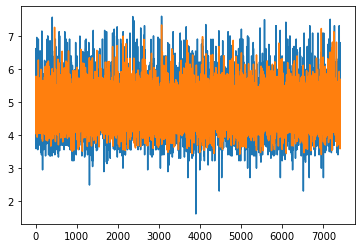

Train error:  0.21840873022623525
Test error:  0.21722303634886223


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


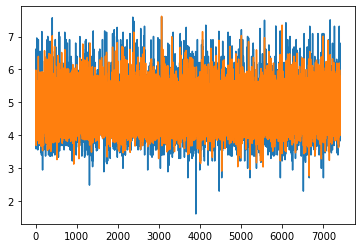

Train error:  0.13830092450425827
Test error:  0.15189293472960064
Round:  2


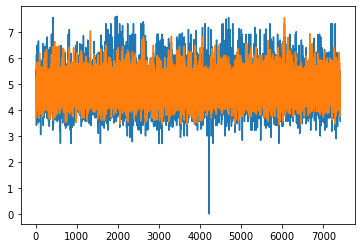

Train error:  0.2189104247096099
Test error:  0.21270542049941082


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


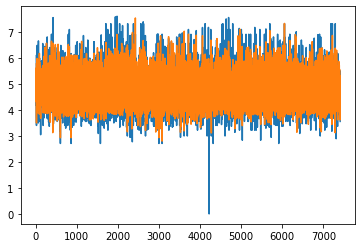

Train error:  0.13933258836598014
Test error:  0.1417213869568442
Round:  3


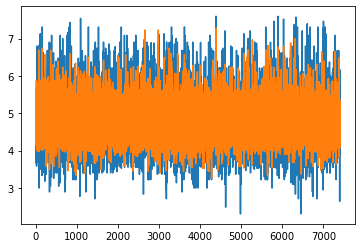

Train error:  0.2186542410383282
Test error:  0.21521266598841168


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


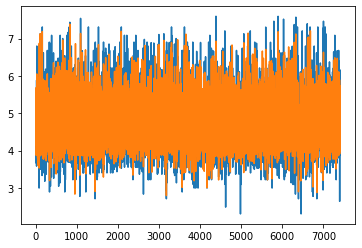

Train error:  0.13897093939632646
Test error:  0.14471031626542455
Round:  4


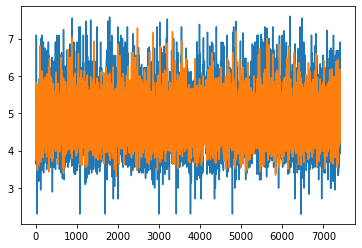

Train error:  0.21770998129855948
Test error:  0.22360964153214485


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


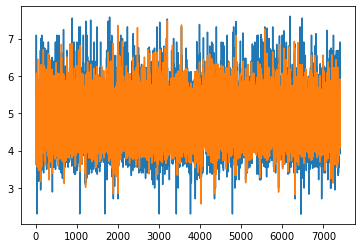

Train error:  0.1386443248939275
Test error:  0.15174069222611156
Round:  5


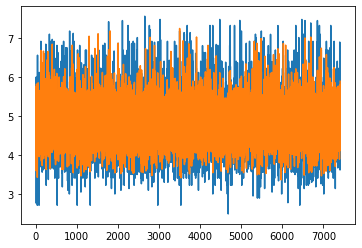

Train error:  0.2189900104530354
Test error:  0.21248892476537162


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


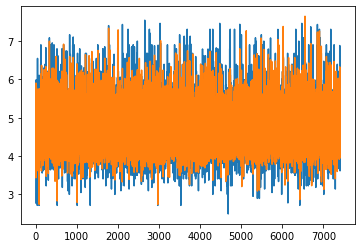

Train error:  0.1396351925701198
Test error:  0.14013616063430506
Round:  6


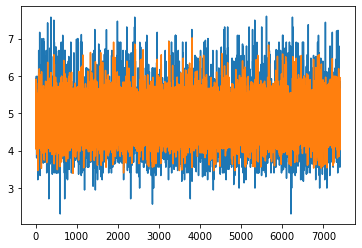

Train error:  0.21842031299620737
Test error:  0.21764793603328572


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


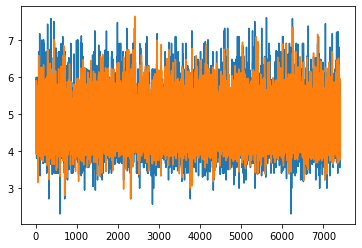

Train error:  0.1390993743681525
Test error:  0.1440446286565496
Round:  7


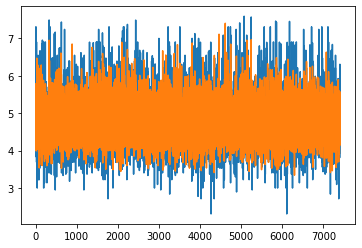

Train error:  0.21850959641420878
Test error:  0.21585016068770704


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


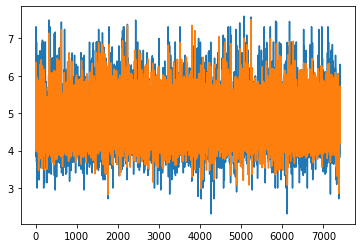

Train error:  0.1392156729090429
Test error:  0.14638792711856846
Round:  8


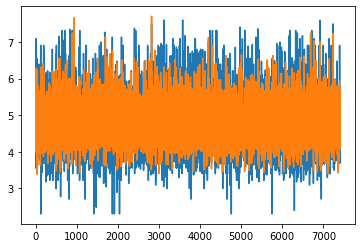

Train error:  0.2176533763488042
Test error:  0.22357436476601972


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


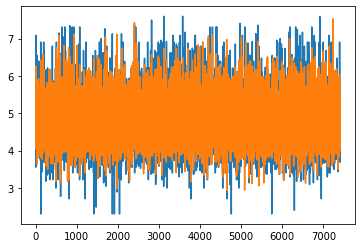

Train error:  0.13901963418111593
Test error:  0.14648803238173363
Round:  9


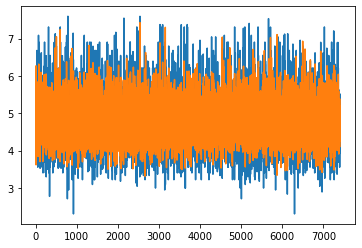

Train error:  0.2180840715627061
Test error:  0.22045509715449393


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


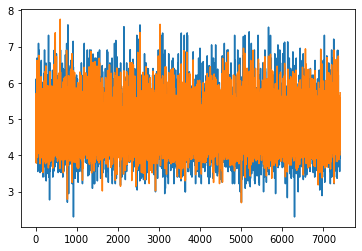

Train error:  0.13887058925908716
Test error:  0.14815681362670974
Round:  10


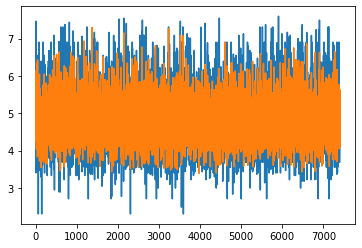

Train error:  0.21702434027772727
Test error:  0.22960148110142015


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


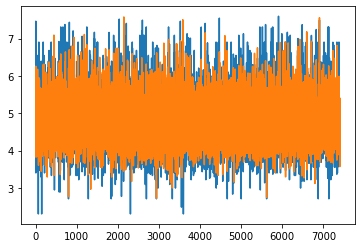

Train error:  0.13835343224677968
Test error:  0.15156900764736433
Traditional Linear Regression
Train mse after 10-fold CV:  0.21823650853254223
Test mse after 10-fold CV:  0.21883687288771275
xgboost
Train mse after 10-fold CV:  0.13894426726947903
Test mse after 10-fold CV:  0.14668479002432117


In [0]:
# split data to train, test
#data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size = 0.2, random_state=0)

linear_test_list = []
xgboost_test_list = []
linear_train_list = []
xgboost_train_list = []

# perfrom 10 fold cross validation:
index = 1
train_error_lin = 0
test_error_lin = 0 
train_error_xgboost = 0
test_error_xgboost = 0 
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(data):
  print("Round: ",str(index))
  X_train, X_test = data.loc[train_index], data.loc[test_index]
  y_train, y_test = labels.loc[train_index], labels.loc[test_index]

  train_mse_lin,test_mse_lin = linear_reg_model(X_train, X_test, y_train, y_test)
  print("Train error: ",train_mse_lin)
  print("Test error: ",test_mse_lin)
  linear_test_list.append(test_mse_lin)
  linear_train_list.append(train_mse_lin)

  train_mse_xgboost,test_mse_xgboost = xgboosterFunc(X_train, X_test, y_train, y_test)
  print("Train error: ",train_mse_xgboost)
  print("Test error: ",test_mse_xgboost)
  xgboost_test_list.append(test_mse_xgboost)
  xgboost_train_list.append(train_mse_xgboost)

  train_error_lin+=train_mse_lin
  test_error_lin+=test_mse_lin
  train_error_xgboost+=train_mse_xgboost
  test_error_xgboost+=test_mse_xgboost
  index+=1

print ("Traditional Linear Regression")
print("Train mse after 10-fold CV: ", str(train_error_lin/10))
print("Test mse after 10-fold CV: ", str(test_error_lin/10))

print ("xgboost")
print("Train mse after 10-fold CV: ", str(train_error_xgboost/10))
print("Test mse after 10-fold CV: ", str(test_error_xgboost/10))



In [0]:
print("linear_test_list")
print(linear_test_list)
print("linear_train_list")
print(linear_train_list)
print("xgboost_test_list")
print(xgboost_test_list)
print("xgboost_train_list")
print(xgboost_train_list)


linear_test_list
[0.21728729981641215, 0.21269553870257157, 0.21515887974689324, 0.22339965057895933, 0.21246391653358082, 0.21759919835270056, 0.2157702127775819, 0.22351654468858836, 0.22066468539657802, 0.22965799446563293]
linear_train_list
[0.21839536922166575, 0.21891179510169684, 0.21860092138279866, 0.2176415231992329, 0.21900256396024648, 0.21836418957675827, 0.21854330659784932, 0.21768246961964677, 0.2181529331014085, 0.2170893851716127]
xgboost_test_list
[0.15189293472960064, 0.1417213869568442, 0.14471031626542455, 0.15174069222611156, 0.14013616063430506, 0.1440446286565496, 0.14638792711856846, 0.14648803238173363, 0.14815681362670974, 0.15156900764736433]
xgboost_train_list
[0.13830092450425827, 0.13933258836598014, 0.13897093939632646, 0.1386443248939275, 0.1396351925701198, 0.1390993743681525, 0.1392156729090429, 0.13901963418111593, 0.13887058925908716, 0.13835343224677968]
